In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL # image module in python
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
train_data_dir = ".//dataset//train"
test_data_dir = ".//dataset//test"
type(train_data_dir)

str

In [3]:
import pathlib
train_data_dir = pathlib.Path(train_data_dir)
test_data_dir = pathlib.Path(test_data_dir)
train_data_dir

WindowsPath('dataset/train')

In [4]:
list(train_data_dir.glob('*/*.jpg')) # it will go through all subdirectories and find all jpg files

[WindowsPath('dataset/train/angry/Training_10118481.jpg'),
 WindowsPath('dataset/train/angry/Training_10120469.jpg'),
 WindowsPath('dataset/train/angry/Training_10131352.jpg'),
 WindowsPath('dataset/train/angry/Training_10161559.jpg'),
 WindowsPath('dataset/train/angry/Training_1021836.jpg'),
 WindowsPath('dataset/train/angry/Training_10269675.jpg'),
 WindowsPath('dataset/train/angry/Training_10278738.jpg'),
 WindowsPath('dataset/train/angry/Training_10290703.jpg'),
 WindowsPath('dataset/train/angry/Training_10295477.jpg'),
 WindowsPath('dataset/train/angry/Training_10315441.jpg'),
 WindowsPath('dataset/train/angry/Training_10316849.jpg'),
 WindowsPath('dataset/train/angry/Training_10333072.jpg'),
 WindowsPath('dataset/train/angry/Training_10334355.jpg'),
 WindowsPath('dataset/train/angry/Training_10345473.jpg'),
 WindowsPath('dataset/train/angry/Training_10422050.jpg'),
 WindowsPath('dataset/train/angry/Training_10485618.jpg'),
 WindowsPath('dataset/train/angry/Training_10503476.jpg')

In [5]:
image_count = len(list(train_data_dir.glob('*/*.jpg')))
image_count

28709

In [6]:
angry = list(train_data_dir.glob('angry/*')) # get all angry file path
angry[:5]

[WindowsPath('dataset/train/angry/Training_10118481.jpg'),
 WindowsPath('dataset/train/angry/Training_10120469.jpg'),
 WindowsPath('dataset/train/angry/Training_10131352.jpg'),
 WindowsPath('dataset/train/angry/Training_10161559.jpg'),
 WindowsPath('dataset/train/angry/Training_1021836.jpg')]

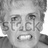

In [7]:
PIL.Image.open(str(angry[8])) # it will show the first angry image

### transfer image files into numpy array
and resize them all into 224*224

In [8]:
train_face_images_dict = {
    'angry': list(train_data_dir.glob('angry/*')),
    'disgust': list(train_data_dir.glob('disgust/*')),
    'fear': list(train_data_dir.glob('fear/*')),
    'happy': list(train_data_dir.glob('happy/*')),
    'neutral': list(train_data_dir.glob('neutral/*')),
    'sad': list(train_data_dir.glob('sad/*')),
    'surprise': list(train_data_dir.glob('surprise/*'))
}

In [9]:
test_face_images_dict = {
    'angry': list(test_data_dir.glob('angry/*')),
    'disgust': list(test_data_dir.glob('disgust/*')),
    'fear': list(test_data_dir.glob('fear/*')),
    'happy': list(test_data_dir.glob('happy/*')),
    'neutral': list(test_data_dir.glob('neutral/*')),
    'sad': list(test_data_dir.glob('sad/*')),
    'surprise': list(test_data_dir.glob('surprise/*'))
}

In [10]:
faces_expression_dict = {
    'angry': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'neutral': 4,
    'sad': 5,
    'surprise': 6
}

#### converting images into arrays

In [11]:
x_train_tran, y_train_tran = [], []

for express_name, images in train_face_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(48,48))
        x_train_tran.append(resized_img)
        y_train_tran.append(faces_expression_dict[express_name])

In [ ]:
x_test_tran, y_test_tran = [], []

for express_name, images in test_face_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(48,48))
        x_test_tran.append(resized_img)
        y_test_tran.append(faces_expression_dict[express_name])

In [13]:
x_train_tran = np.array(x_train_tran)
y_train_tran = np.array(y_train_tran)
x_test_tran = np.array(x_test_tran)
y_test_tran = np.array(y_test_tran)

In [14]:
x_train_scaled_tran = x_train_tran / 255
x_test_scaled_tran = x_test_tran / 255

## load pre-train model

In [15]:
import tensorflow_hub as hub

In [17]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(48, 48, 3), trainable=False)

## CNN pre-trained model: 

In [20]:
num_classes = 7

In [21]:
def get_model_tran():
    model_tran = tf.keras.Sequential([
        pretrained_model_without_top_layer,
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    model_tran.compile(
        optimizer="adam",
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['acc'])
    
    return model_tran

In [22]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model_tran = get_model_tran()
    cpu_model_tran.fit(x_train_scaled_tran, y_train_tran, epochs=10, batch_size= 4)
    cpu_model_tran.save('FER_cpu_model_tran.keras')
    cpu_model_tran.save_weights('./checkpoints/FER_cpu_model_tran_checkpoint')

MemoryError: Unable to allocate 16.1 GiB for an array with shape (28709, 224, 224, 3) and data type float32

In [ ]:
with tf.device('/CPU:0'):
    new_model = tf.keras.models.load_model('FER_cpu_model_tran.keras')
    new_model.evaluate(x_test_scaled_tran,y_test_tran)

In [ ]:
with tf.device('/CPU:0'):
    new_model = tf.keras.models.load_model('FER_cpu_model_tran.keras')
    new_model_tran.summary()

In [ ]:
with tf.device('/CPU:0'):
    new_model = tf.keras.models.load_model('FER_cpu_model_tran.keras')
    y_predicted_tran = new_model.predict(x_test_scaled_tran)

In [ ]:
y_predicted_labels_tran = [np.argmax(i) for i in y_predicted_tran]
labels =['angry','disgust','fear','happy','neutral','sad','surprise']
y_labels_tran = [labels[r] for r in y_predicted_labels_tran]
y_test_label_tran = [labels[t] for t in y_test_tran]

cm = tf.math.confusion_matrix(labels=y_test_label_tran,predictions=y_labels_tran)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')